
# Project : Investigate a Dataset ( TMDB Movie Database )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this project I will analyiaz data from Movie Database (TMDb) , This data set contains informationabout 10,000 movies collected,including user ratings and revenue.
●Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters.
●There are some odd charactersin the ‘cast’ column. Don’t worryabout cleaning them. You canleave them as is.
●The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime.

> ### from analyising this data we can answer Questions like :

>1- what's  the trends of specidic  genres and how it was  popular from year to year? 

>2- which years had  the most popular moives  ?

>3- which movies make the largest Revenue ?

>4- which movies have the largest run times ?

>5- which movies have the higher and latest average Vote?

>6-  which  production company produced more movies  ?

>7- How many directors get  in vote average more than 8 ?


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> *I will analyze and explore this dataset, and find which genres are most popular in a certain year? 
 what's the name of the movies with the lowest vote?
### General Properties

In [2]:
tmdb = pd.read_csv('tmdb-movies.csv')

In [3]:
tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [7]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 

### Drop Extraneous Columns

In [8]:
tmdb.drop(['id','imdb_id', 'homepage', 'overview', 'release_date','tagline','cast','keywords'], axis=1, inplace=True)
# confirm changes
tmdb.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
tmdb.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


 ### drop missing data and duplicate

In [10]:
tmdb.dropna(inplace=True)

In [9]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
tmdb.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   vote_count            9807 non-null   int64  
 9   vote_average          9807 non-null   float64
 10  release_year          9807 non-null   int64  
 11  budget_adj            9807 non-null   float64
 12  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.0+ MB


In [11]:
# check agian 
tmdb.isnull().any(axis = 1).sum()

8874

In [13]:
#duplicate rows
sum(tmdb.duplicated())

1

In [14]:
tmdb.drop_duplicates(inplace=True)

In [15]:
#duplicate rows
sum(tmdb.duplicated())

0

In [16]:
# fix genres format 
type(tmdb.genres[0])

str

In [17]:
tmdb.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 9806, dtype: object

In [18]:
# I replaced | to space to make it easy when fillter Genres.
tmdb.genres = tmdb.genres.str.replace("|"," ") 
tmdb.genres = tmdb.genres.str.replace("Science Fiction"," Science_Fiction" ) 
tmdb.genres 

0        Action Adventure  Science_Fiction Thriller
1        Action Adventure  Science_Fiction Thriller
2               Adventure  Science_Fiction Thriller
3         Action Adventure  Science_Fiction Fantasy
4                             Action Crime Thriller
                            ...                    
10861                                   Documentary
10862                        Action Adventure Drama
10863                                Mystery Comedy
10864                                 Action Comedy
10865                                        Horror
Name: genres, Length: 9806, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis





## 1- what's  the trends of specidic  genres and how it was  popular from year to year? 


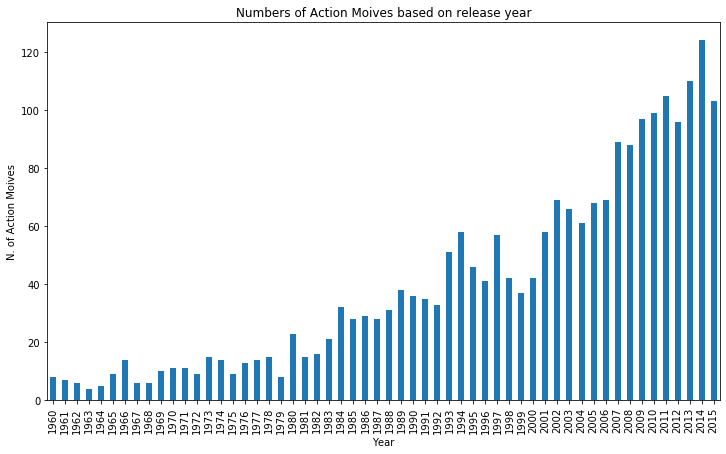

In [199]:
# Action moives 
tmdb_Action = tmdb[tmdb['genres'].str.contains('Action')] 
tmdb_Action['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Action Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Action Moives');

In [85]:
tmdb_Action.shape

(2235, 13)

  >  This graph indicats that we can see that  Action Moives in total 2235  and the most ot them were produced is in 2014 and the least is 1963

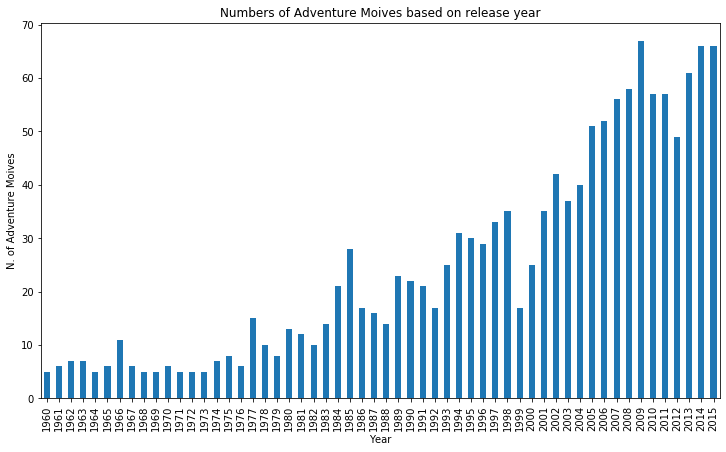

In [200]:
# Adventure moives
tmdb_Adventure = tmdb[tmdb['genres'].str.contains('Adventure')]
tmdb_Adventure['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Adventure Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Adventure Moives');

In [84]:
tmdb_Adventure.shape

(1385, 13)

 >   This graph indicats  that  Adventuere Moives in total 1385  and the most ot themm were produced is in 2009 and the least is 1964

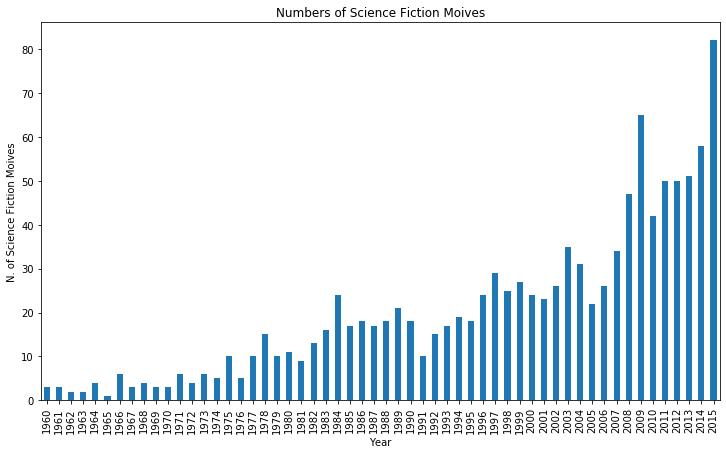

In [202]:
#  Science Fiction moives  
tmdb_sc_fi= tmdb[tmdb['genres'].str.contains('Science_Fiction') == True ]
tmdb_sc_fi['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Science Fiction Moives');
plt.xlabel('Year');
plt.ylabel('N. of Science Fiction Moives');

In [86]:
tmdb_sc_fi.shape

(1137, 13)

 > This graph indicats  that Science Fiction Moives in total 1137 and the most ot them were produced is in 2015 and the least is 1965

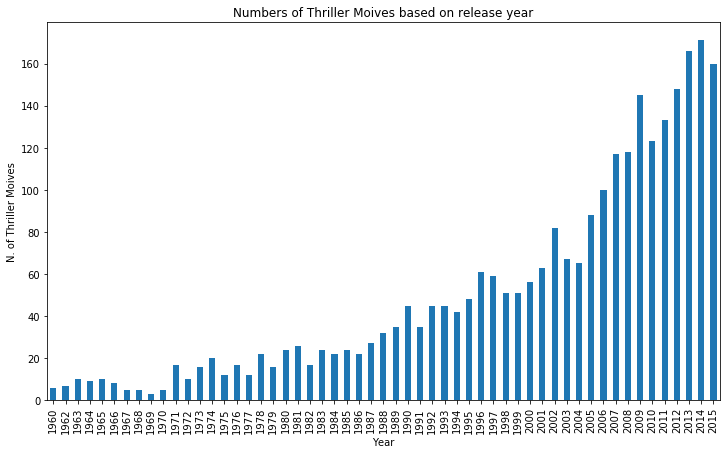

In [205]:
# Thriller moives  
tmdb_Thriller= tmdb[tmdb['genres'].str.contains('Thriller') == True ]
tmdb_Thriller['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Thriller Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Thriller Moives');

In [88]:
tmdb_Thriller.shape

(2747, 13)

 > from this graph we can see that Thriller Moives in total 2747  and the most ot them were produced is in 2014 and the least is from 1969 . 

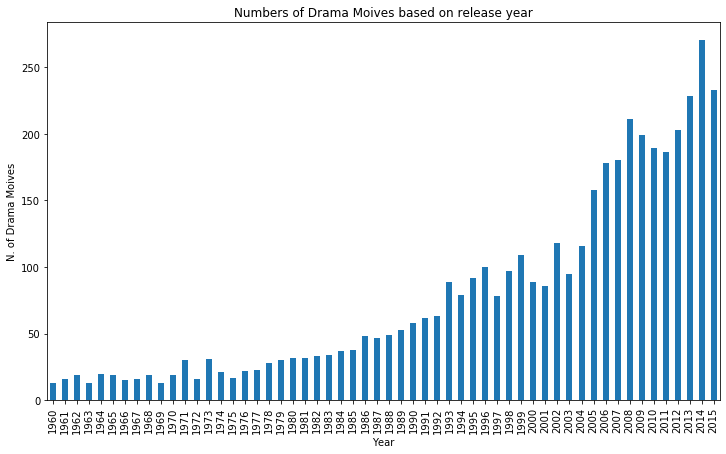

In [206]:
# Drama moive 
tmdb_drama= tmdb[tmdb['genres'].str.contains('Drama') == True ]
tmdb_drama['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Drama Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Drama Moives');

In [89]:
tmdb_drama.shape

(4369, 13)

 > from this graph we can see that Drama Moives in total 4369  and the most ot them were produced is in 2014 and the least is from 1963 and 1969 and Drama is the most popular genre.

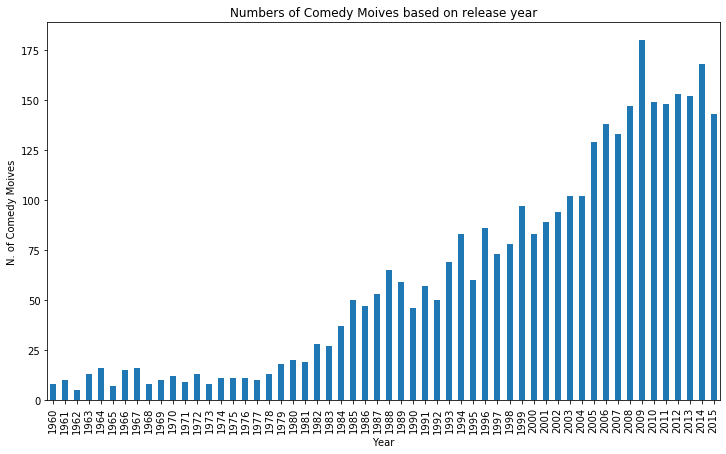

In [207]:
# Comedy moives 
tmdb_comedy= tmdb[tmdb['genres'].str.contains('Comedy') == True ]
tmdb_comedy['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Comedy Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Comedy Moives');

In [90]:
tmdb_comedy.shape

(3438, 13)

 > from this visual we can see that Comady Moives in total 3438  and the most ot them were produced is in 2009 and the least is in 1962.

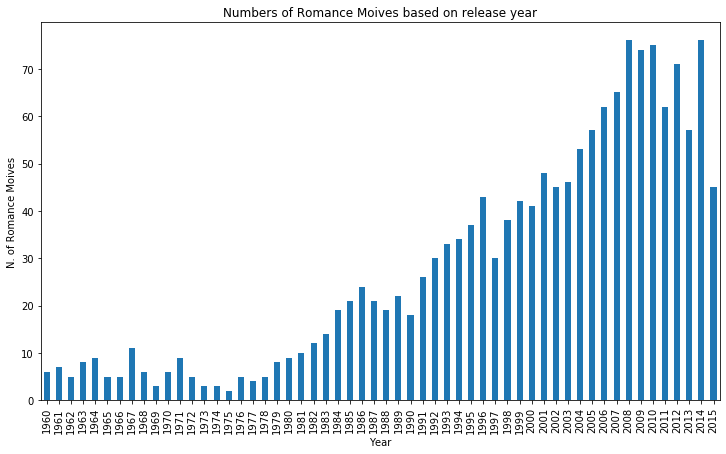

In [208]:
# Romance moives 
tmdb_romance= tmdb[tmdb['genres'].str.contains('Romance') == True ]
tmdb_romance['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Romance Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Romance Moives');

In [222]:
tmdb_romance.shape[0]

1570

 > from this graph we can see that romance Moives in total 1570  and the most ot them were produced is in 2014 and 2009 and the least is from 1975.

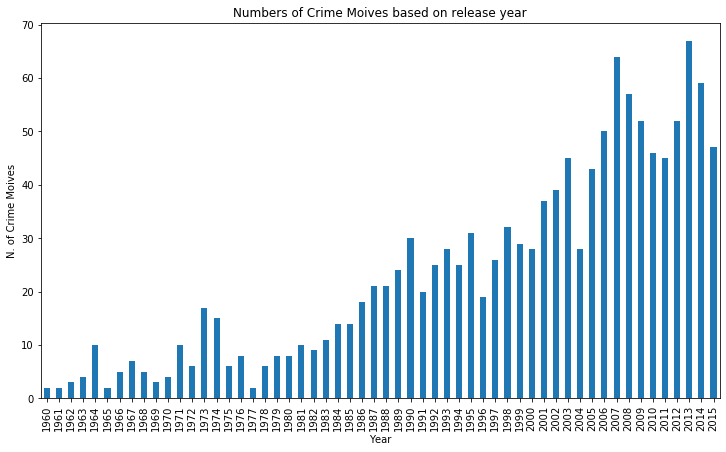

In [209]:
# Crime moives
tmdb_crime = tmdb[tmdb['genres'].str.contains('Crime') == True ]
tmdb_crime['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Crime Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Crime Moives');

In [223]:
tmdb_crime.shape[0]

1299

 > from this graph we can see that Crime Moives in total 1299  and the most ot them were produced is in 2013 and the least is from 1960,1961, 1965 and  1977.

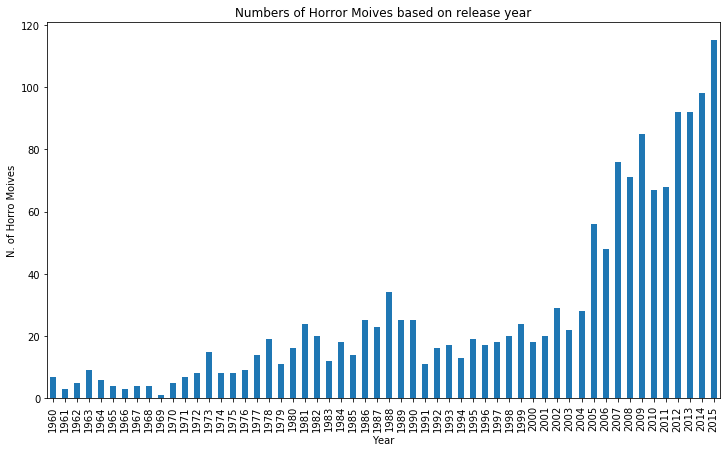

In [219]:
# Horror moives 
tmdb_horror= tmdb[tmdb['genres'].str.contains('Horror') == True ]
tmdb_horror['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Horror Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Horro Moives');

In [224]:
tmdb_horror.shape[0]

1526

 > from this graph we can see that Horror Moives in total 1562  and the most ot them were produced is in 2015 and the least is from 1969.

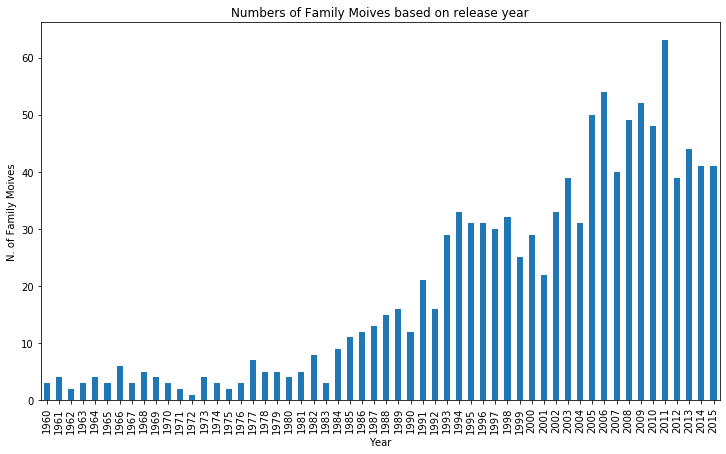

In [210]:
# Family moives 
tmdb_family= tmdb[tmdb['genres'].str.contains('Family') == True ]
tmdb_family['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Family Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Family Moives');

In [225]:
tmdb_family.shape[0]

1103

 >   This graph indicats  that  family Moives in total 1103  and the most ot themm were produced is in 2011 and the least is 1971.

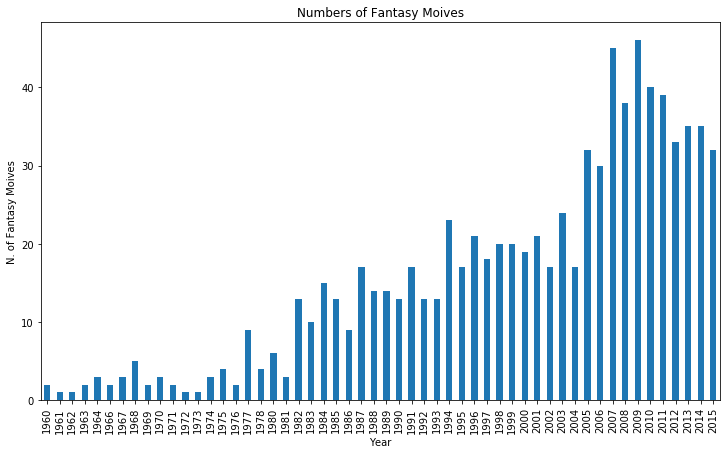

In [221]:
# Fantasy moives 
tmdb_fantasy= tmdb[tmdb['genres'].str.contains('Fantasy') == True ]
tmdb_fantasy['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Fantasy Moives');
plt.xlabel('Year');
plt.ylabel('N. of Fantasy Moives');

In [226]:
tmdb_fantasy.shape[0]

842

 >   This graph indicats  that  Fantasy Moives in total 842  and the most ot them were produced is in 2010 and the least is 1961 , 1962 m 1972 and 1973.

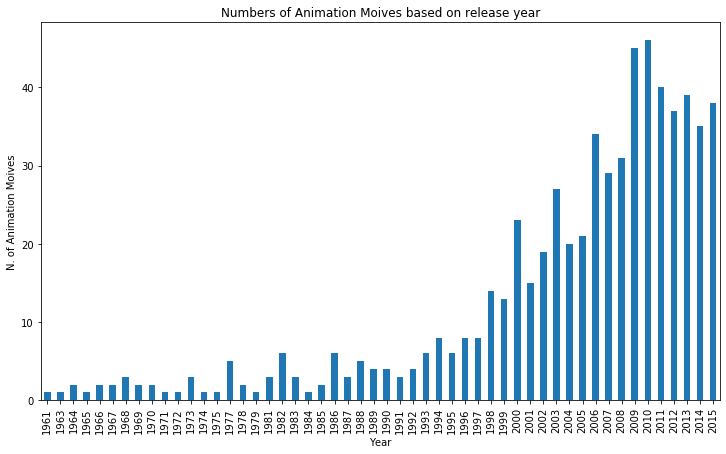

In [213]:
# Animation moives 
tmdb_animation= tmdb[tmdb['genres'].str.contains('Animation') == True ]
tmdb_animation['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Animation Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Animation Moives');

In [227]:
tmdb_animation.shape[0]

637

 >   This graph indicats  that  Animation Moives in total 637  and the most ot them were produced is in 2010 and the least is 1961 .

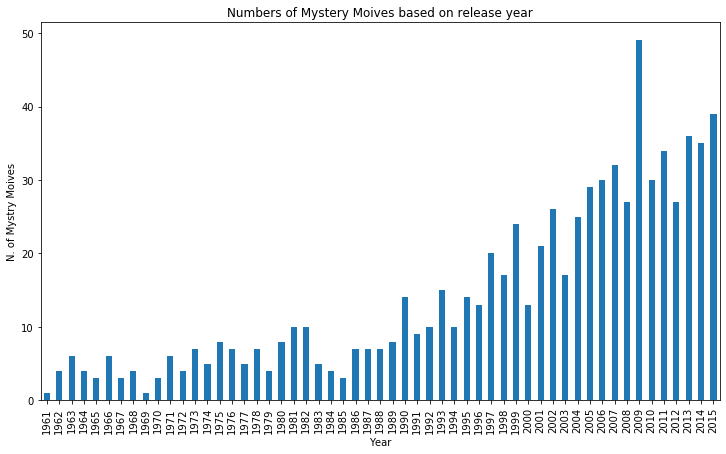

In [218]:
# Mystery moives 
tmdb_mystery= tmdb[tmdb['genres'].str.contains('Mystery') == True ]
tmdb_mystery['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Mystery Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Mystry Moives');

In [228]:
tmdb_mystery.shape[0]

773

 >   This graph indicats  that  Mystery Moives in total 773  and the most ot themm were produced is in 2009 and the least is 1961 and 1969

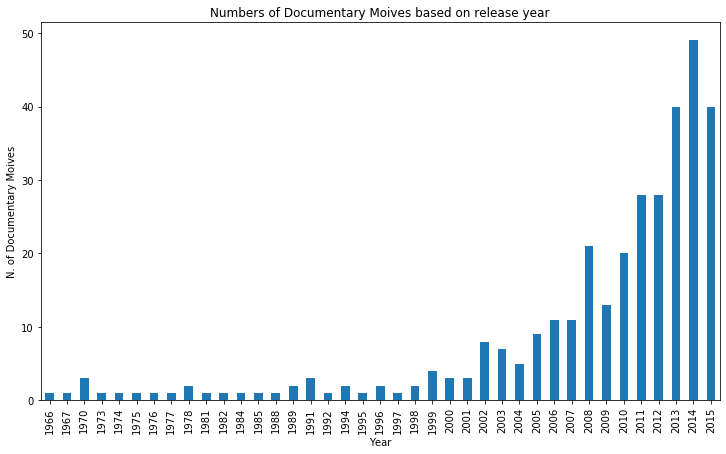

In [220]:
 # Documentary  moives 
tmdb_documentary = tmdb[tmdb['genres'].str.contains('Documentary') == True ]
tmdb_documentary ['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Documentary Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Documentary Moives');

In [230]:
tmdb_documentary.shape[0]

331

 >   This graph indicats  that Documentary Moives in total 331  and the most ot themm were produced is in 2014 .

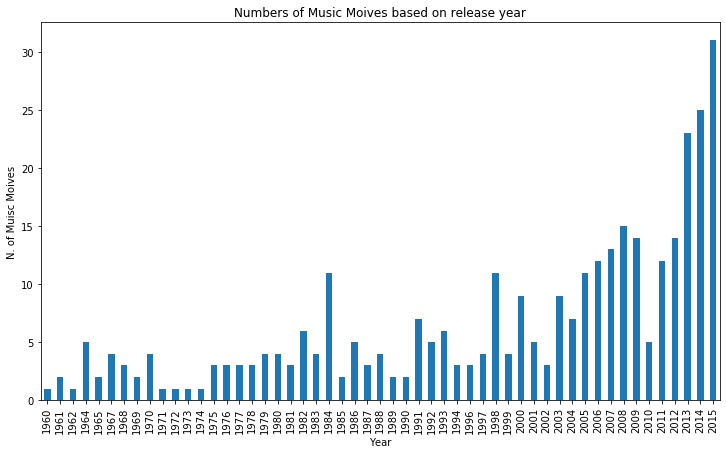

In [217]:
# Music moives
tmdb_music = tmdb[tmdb['genres'].str.contains('Music') == True ]
tmdb_music ['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Music Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Muisc Moives');

In [229]:
tmdb_music.shape[0]

341

 >   This graph indicats  that  Muisc Moives in total 341  and the most ot themm were produced is in 2015 and the least is 1962.

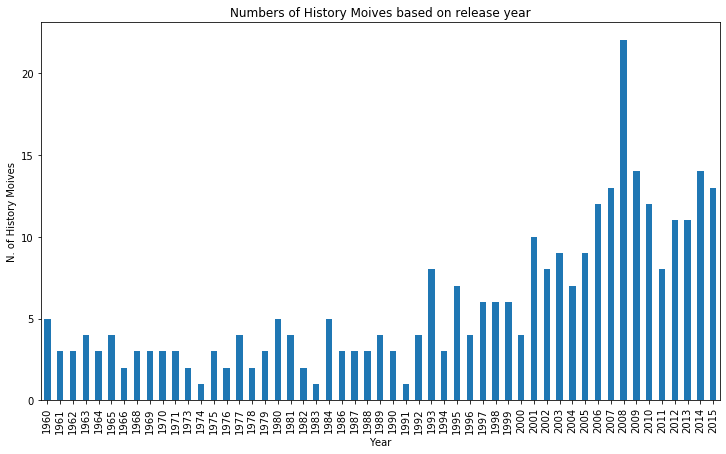

In [216]:
# History moives
tmdb_histo= tmdb[tmdb['genres'].str.contains('History') == True ]
tmdb_histo['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of History Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of History Moives');

In [231]:
tmdb_histo.shape[0]

308

 >   This graph indicats  that  Histoary Moives in total 308 and the most ot themm were produced is in 2008 and the least is 1974 and 1983.

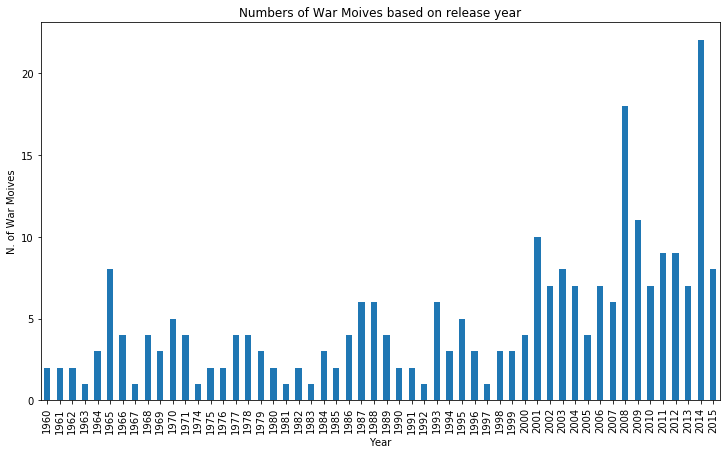

In [215]:
# war moives  
tmdb_war= tmdb[tmdb['genres'].str.contains('War') == True ]
tmdb_war['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of War Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of War Moives');

In [232]:
tmdb_war.shape[0]

259

 >   This graph indicats  that War  Moives in total 259  and the most ot them were produced is in 2014 and the least is 1963 ,

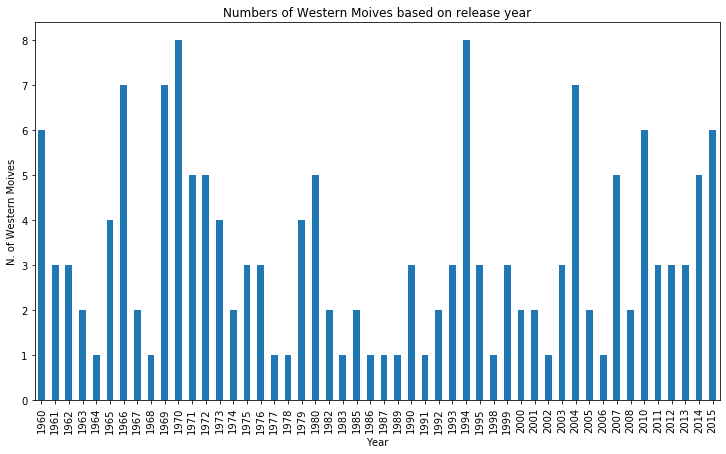

In [214]:
# Western  moives 
tmdb_westren= tmdb[tmdb['genres'].str.contains('Western') == True ]
tmdb_westren['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout();
plt.title('Numbers of Western Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Western Moives');

In [233]:
tmdb_westren.shape[0]

160

 >   This graph indicats  that  Western Moives in total 160 and the most ot themm were produced is in 1970 and 1994 and the least is 1964.

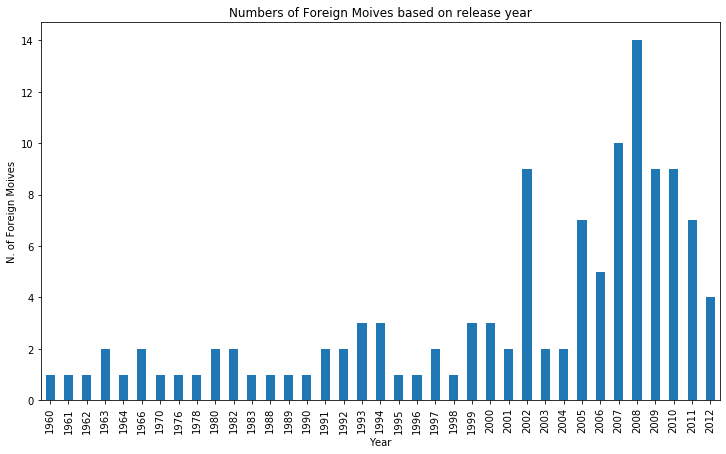

In [197]:
# Foreign moives 
tmdb_FM= tmdb[tmdb['genres'].str.contains('Foreign') == True ]
tmdb_FM['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout()
plt.title('Numbers of Foreign Moives based on release year');
plt.xlabel('Year');
plt.ylabel('N. of Foreign Moives');

In [234]:
tmdb_FM.shape[0]

120

 >   This graph indicats  that Foreign Moives in total 120  and the most ot themm were produced is in 2008 and the least is 1960.

# I serarch about How to counts each genres , here is the Reference
[Reference](https://stackoverflow.com/questions/38557617/how-to-get-all-the-unique-words-in-the-data-frame )


In [41]:
countGen = tmdb['genres'].str.split(' ', expand=True).stack().value_counts() 
countGen

Drama              4369
Comedy             3438
Thriller           2747
Action             2235
Romance            1570
Horror             1526
Adventure          1385
Crime              1299
                   1137
Science_Fiction    1137
Family             1103
Fantasy             842
Mystery             773
Animation           637
Music               341
Documentary         331
History             308
War                 259
Western             160
Movie               132
TV                  132
Foreign             120
dtype: int64

In [42]:
# I will drop TV and Moive form countGen
countGen.drop(labels=['TV', 'Movie'] , inplace = True)

In [43]:
countGen.drop(labels=[''] , inplace = True)

In [44]:
countGen.index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Science_Fiction', 'Family', 'Fantasy', 'Mystery',
       'Animation', 'Music', 'Documentary', 'History', 'War', 'Western',
       'Foreign'],
      dtype='object')

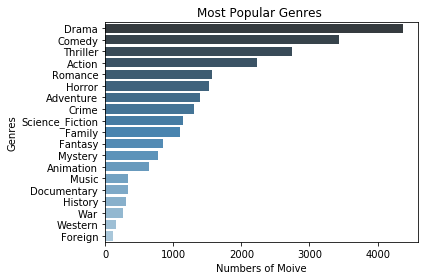

In [45]:
geners_plot= sns.barplot(x=countGen, y=countGen.index ,palette="Blues_d") ;
geners_plot.set_title('Most Popular Genres ');
geners_plot.set_ylabel('Genres');
geners_plot.set_xlabel('Numbers of Moive');
plt.tight_layout()

## 2- which years had  the most popular moives  ?

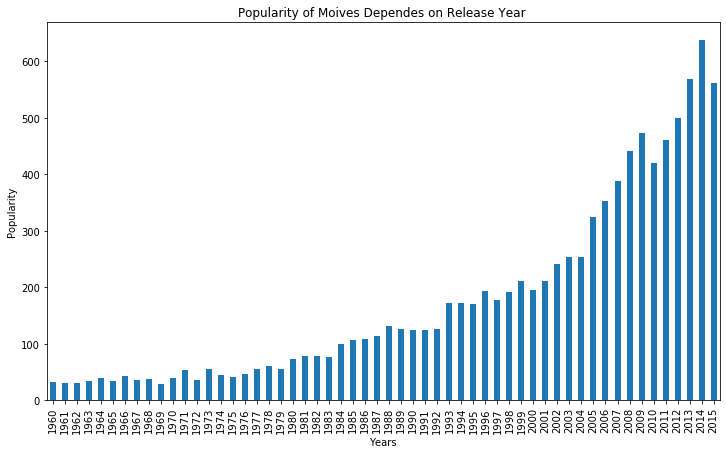

In [236]:
tmdb.groupby(by='popularity').max()['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout()
plt.title('Popularity of Moives Dependes on Release Year ');
plt.xlabel('Years');
plt.ylabel('Popularity');

We can see that in 2014 was the most Poupoluar moives were produeced .

## 3- which movies make the largest Revenue ?

In [579]:
max_rev = tmdb['revenue'].max()

In [580]:
tmdb[tmdb['revenue'] == max_rev]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action Adventure Fantasy Science_Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09


## 4- which movies have the largest run times ?

In [581]:
# 
max_runTime = tmdb['runtime'].max()
max_runTime 

877

In [583]:
tmdb[tmdb['runtime'] == max_runTime]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
4041,0.469332,0,0,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science_Fiction,DreamWorks,38,6.8,2002,0.0,0.0


 ## 5- which movies have the higher and latest average Vote?

In [584]:
#find which moive had the lowest average vot
minvote= tmdb['vote_average'].min()
tmdb[tmdb['vote_average'] == minvote]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
7772,0.121120,0,0,Transmorphers,Leigh Scott,86,Action Adventure Science_Fiction,"Asylum, The",10,1.5,2007,0.000000,0.0
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0


In [681]:
# which moives get higher vote average
max_vote = tmdb['vote_average'].max()
tmdb[tmdb['vote_average'] == max_vote]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
6911,0.21201,0,0,Pink Floyd: Pulse,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006,0.0,0.0


## 6-  which  production company produced more movies  ?

In [617]:
# counts the each production companies
tmdb['production_companies'].value_counts()

Paramount Pictures                                                                                               156
Universal Pictures                                                                                               133
Warner Bros.                                                                                                      84
Walt Disney Pictures                                                                                              75
Columbia Pictures                                                                                                 72
                                                                                                                ... 
Dimension Films|Focus Features|Good Machine|Radar Pictures                                                         1
Bronson Avenue|Paramount Pictures Digital Entertainment|Mountain Dew Green Label Studios|Milchan / Van Eyssen      1
Fuzzy Logic Pictures|Strongman|Wigwam Films                     

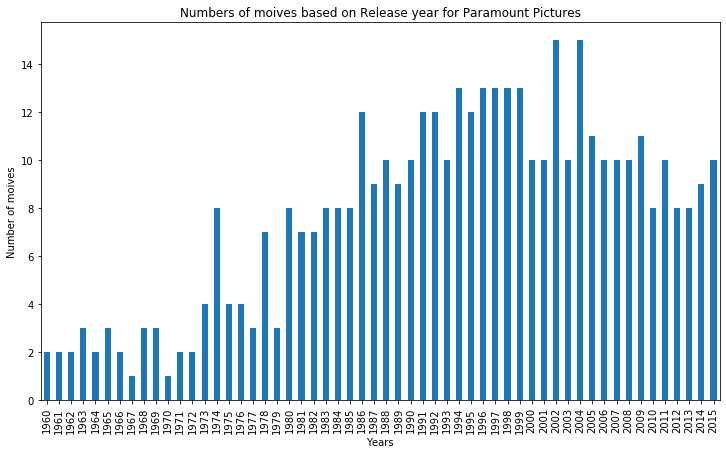

In [237]:
# make visual for amounts of production for Paramount Pictures

tmdb[tmdb['production_companies'].str.contains('Paramount Pictures')]['release_year'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout()
plt.title('Numbers of moives based on Release year for Paramount Pictures'); 
plt.xlabel('Years');
plt.ylabel('Number of moives');

 this visual indicats that in 2002 and 2004 Paramount Pictures (which is has the most porduced moivess ) have more produced moives.

 ## 7 -  How many directors get  in vote average more than 8 ?

In [659]:
# whcih directors produced more moives (Top 5) 
tmdb['director'].value_counts()[:5]

Woody Allen         42
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     26
Ridley Scott        23
Name: director, dtype: int64

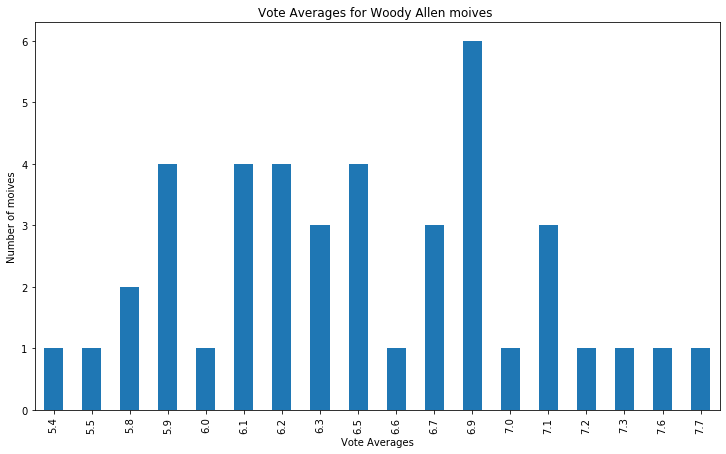

In [238]:
# what are the vote averages for Woody Allen moives  
tmdb[ tmdb['director'] == 'Woody Allen']['vote_average'].value_counts().sort_index().plot.bar(figsize= (10,6))
plt.tight_layout()
plt.title('Vote Averages for Woody Allen moives ');
plt.xlabel('Vote Averages');
plt.ylabel('Number of moives');

 this bar shows  the vote averages for Woody Allen moives , most of his moives get 6.9 vote .

In [680]:
# which moives get vote_average >= 8.5
tmdb[tmdb['vote_average'] >= 8.5]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure Documentary,Red Bull Media House|Brain Farm Digital Cinema,60,8.5,2011,0.0,0.0
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,23,8.7,2006,0.0,0.0
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,Miramax Films|British Film Institute (BFI),11,8.5,1995,0.0,0.0
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,Edel records GmbH,14,8.5,1981,0.0,0.0


<a id='conclusions'></a>
## Conclusions

form analyzing this dataset which includes 9807 samples,  I think it's small samples after doping missing values and if It has more than this number of samples it could be more helpful and we can get more insight.
> statistical about TMDB dataset :

In [242]:
tmdb.mean()

popularity      6.931433e-01
budget          1.612525e+07
revenue         4.407785e+07
runtime         1.027443e+02
vote_count      2.386226e+02
vote_average    5.966459e+00
release_year    2.000890e+03
budget_adj      1.935070e+07
revenue_adj     5.685528e+07
dtype: float64

In [241]:
tmdb.max()

popularity                                32.9858
budget                                  425000000
revenue                                2781505847
original_title                           í•˜ìš¸ë§
director                Ã€lex Pastor|David Pastor
runtime                                       877
genres                           Western Thriller
production_companies                 í”„ë¡œë•ì…˜M
vote_count                                   9767
vote_average                                  8.7
release_year                                 2015
budget_adj                               4.25e+08
revenue_adj                           2.82712e+09
dtype: object

In [243]:
tmdb.min()

popularity                                                       0.000188
budget                                                                  0
revenue                                                                 0
original_title                                                   $5 a Day
director                                                FrÃ©dÃ©ric Jardin
runtime                                                                 0
genres                                                    Science_Fiction
production_companies    10th Hole Productions|Anonymous Content|Ambush...
vote_count                                                             10
vote_average                                                          1.5
release_year                                                         1960
budget_adj                                                              0
revenue_adj                                                             0
dtype: object

In [247]:
tmdb.groupby('budget').max()

,popularity,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,,,,,,,,,,,,
0,3.927333,253625427,í•˜ìš¸ë§,Ã€lex Pastor|David Pastor,877,Western Drama Crime Romance,í”„ë¡œë•ì…˜M,1329,8.7,2015,0.000000e+00,4.559735e+08
1,0.520430,1378,"Love, Wedding, Marriage",Robert Hall,100,Horror,Paramount Pictures|Nickelodeon Movies|Stella-d...,146,6.5,2014,1.309053e+00,1.335831e+03
2,0.464188,16,Death Wish 2,Michael Winner,88,Action Crime Thriller,Cannon Films,27,5.6,1982,4.519285e+00,3.615428e+01
3,0.317091,43,Tales from the Darkside: The Movie,Taika Waititi,97,Fantasy Horror Comedy,Paramount Pictures|Laurel Productions|Darkside...,37,7.3,2011,5.006696e+00,4.300000e+01
5,0.002922,0,Des Lendemains Qui Chantent,Nicolas Castro,94,Comedy,UGC Distribution,13,6.0,2014,4.605455e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
270000000,1.957331,391081192,Superman Returns,Bryan Singer,154,Adventure Fantasy Action Science_Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,834,5.3,2006,2.920507e+08,4.230205e+08
280000000,5.944927,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action Adventure Science_Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015,2.575999e+08,1.292632e+09
300000000,4.965391,961000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Adventure Fantasy Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2626,6.8,2007,3.155006e+08,1.010654e+09


In [249]:
tmdb.groupby('release_year').describe()

popularity                                                    \
                  count      mean       std       min       25%       50%   
release_year                                                                
1960               32.0  0.458932  0.541833  0.055821  0.158091  0.268273   
1961               30.0  0.430438  0.533781  0.027527  0.179415  0.273879   
1962               30.0  0.465245  0.571246  0.038819  0.211450  0.299075   
1963               34.0  0.502706  0.551040  0.045417  0.184746  0.249940   
1964               41.0  0.421091  0.625323  0.008990  0.131149  0.194941   
1965               34.0  0.352522  0.401984  0.014759  0.145272  0.213382   
1966               44.0  0.308457  0.243678  0.034555  0.141003  0.245917   
1967               37.0  0.501166  0.607523  0.054432  0.161576  0.247575   
1968               37.0  0.506612  0.558978  0.005265  0.190352  0.378658   
1969               29.0  0.441299  0.383963  0.021121  0.214344  0.338357   
1970               40.0  0.341638  0.305697  0.020760  0.194468  0.282984   
1971               55.0  0.448112  0.545079  0.000188  0.141973  0.306073   
1972               37.0  0.469449  0.915215  0.024345  0.198304  0.269252   
1973               55.0  0.494462  0.447417  0.021941  0.202036  0.383880   
1974               44.0  0.469544  0.561704  0.029670  0.189727  0.317458   
1975               42.0  0.533266  0.672451  0.017468  0.180148  0.315883   
1976               46.0  0.476533  0.515930  0.002381  0.194633  0.327108   
1977               55.0  0.647046  1.622872  0.046957  0.156863  0.318679   
1978               61.0  0.430003  0.376905  0.044675  0.177276  0.324081   
1979               56.0  0.597555  0.786180  0.019263  0.166411  0.373479   
1980               73.0  0.519920  0.737230  0.031133  0.156245  0.307691   
1981               78.0  0.455818  0.607110  0.046679  0.162411  0.293978   
1982               80.0  0.547968  0.654682  0.003659  0.169200  0.379799   
1983               77.0  0.555111  0.683445  0.015727  0.218042  0.373977   
1984              100.0  0.611466  0.679996  0.059713  0.236434  0.376775   
1985              106.0  0.596628  0.696756  0.047123  0.230921  0.423010   
1986              110.0  0.539466  0.396400  0.058402  0.279664  0.429353   
1987              114.0  0.533222  0.501649  0.005529  0.224535  0.366848   
1988              133.0  0.489926  0.483044  0.019075  0.205910  0.340089   
1989              129.0  0.584273  0.694867  0.046709  0.217076  0.360056   
1990              126.0  0.553660  0.546329  0.024987  0.255929  0.402068   
1991              125.0  0.515138  0.540612  0.048237  0.232415  0.357891   
1992              127.0  0.605446  0.665057  0.028515  0.265614  0.451555   
1993              172.0  0.560883  0.437061  0.014992  0.271013  0.471346   
1994              174.0  0.696182  1.038407  0.061916  0.271173  0.420384   
1995              170.0  0.728288  0.695201  0.052554  0.315580  0.514108   
1996              196.0  0.618728  0.568326  0.028143  0.312700  0.463802   
1997              180.0  0.703757  0.685117  0.022145  0.264338  0.486144   
1998              191.0  0.662964  0.600175  0.037178  0.255228  0.477036   
1999              212.0  0.673304  0.955655  0.034182  0.238749  0.392423   
2000              197.0  0.599521  0.575386  0.005784  0.210654  0.417675   
2001              212.0  0.771896  1.013507  0.026783  0.268261  0.469691   
2002              243.0  0.745345  0.880817  0.017708  0.254126  0.485311   
2003              254.0  0.768583  1.011804  0.013546  0.246135  0.451680   
2004              253.0  0.825507  0.822700  0.022891  0.287114  0.545686   
2005              324.0  0.676685  0.730884  0.000973  0.262836  0.449346   
2006              353.0  0.662656  0.708851  0.001115  0.245865  0.451217   
2007              392.0  0.635896  0.642864  0.009512  0.228429  0.435877   
2008              443.0  0.628929  0.753397  0.001317  0.234366  0.408518   
2009     

### here is some insightful points about TMDB datasets:

>1- We can see that most top 5 genres for movies were Drama, Comedy, Thriller, Action, and then Romance.

>2- And after analyzing the popularity with the release year we can see that the most popular movies were in 2015 and the latest popular movies were in  1960.

>3- The largest revenue which was 2781505847 was for Avatar movies in 2009, by James Cameron.

>4- other insights from the analysis were , Transmorphers and  Manos: The Hands of Fate make the lowest average Vote  . on the other hand,  Pink Floyd: Pulse was the higher average Vote.

>5-  if I want to see which production companies make more movies, we can see that was the Top Paramount Pictures with 156 movies.

>6- if I want to see who are many directors get in vote average of more than 8,  it seems likes the top 5 are  Woody Allen  , Clint Eastwood , Steven Spielberg , Martin Scorsese and Ridley Scott .

>7-finally , we can see that there are 4 movies which get a vote average of more than or equals  8.5 . 
### limitation :
 I think there are some limitation wiht TMDB dataset :
> 1- there is a lot of miising Data which I think  after drop it , make effect in analysing . 

> 2- the run time Cloumn  saves as int value which I think it would be better if it was float ,also , what's the unit for the time Hours or minutes ?! 

> 3- also , if there is values of Prize which indicates how many times the moives take Prize , it will be helpful 
during analysis we can find which moives takes higer prazie or which moives geners take more prize than other . 

